In [1]:
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

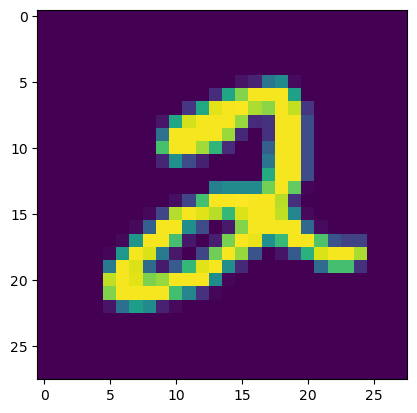

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [14]:
X_train = X_train/255
X_test =X_test/255

In [22]:
X_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
from tensorflow.keras.models import Sequential
# Define the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [42]:
history=model.fit(X_train,y_train,epochs=15,validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.4848 - val_loss: 0.4746
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5142 - val_loss: 0.3432
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4002 - val_loss: 0.3000
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3538 - val_loss: 0.2738
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3194 - val_loss: 0.2517
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3021 - val_loss: 0.2298
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2801 - val_loss: 0.2147
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2600 - val_loss: 0.1950
Epoch 9/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2348 - val_loss: 0.1830
Epoch 10/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2141 - val_loss: 0.1685
Epoch 11/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2014 - val_loss: 0.1584
Epoch 12/15
1688/1688 ━━━━━━━━

In [43]:
y_prod=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [44]:
y_pred=y_prod.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9364

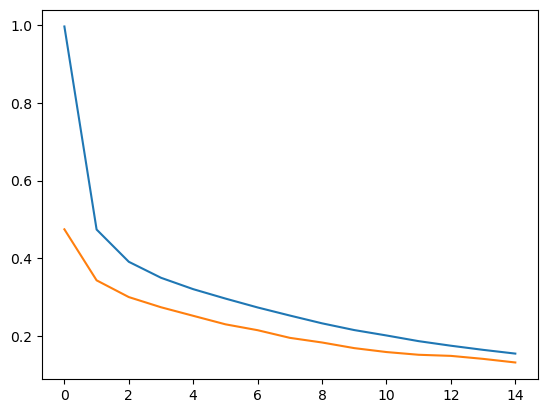

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

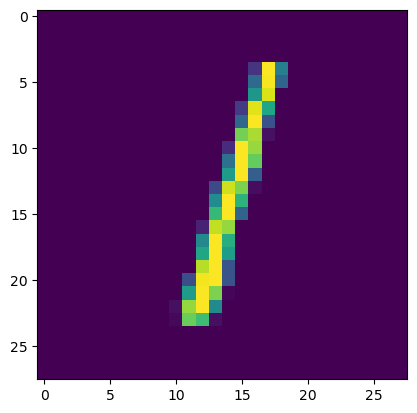

In [56]:
plt.imshow(X_test[2])

In [57]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([1], dtype=int64)